In [39]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import our input dataset
df = pd.read_csv('../neural-network/pitcher_salaries_cleaned.csv')
df

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4
4933,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12
4934,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24
4935,2016,YoungChris,37,4250000,6.19,104,61,94,28,3,9,266,406,7,255,82,AL,KCA,13


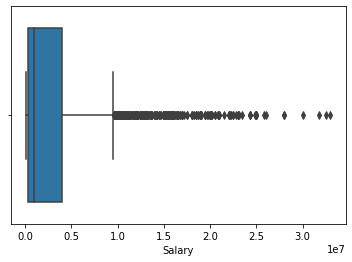

In [25]:
sns.boxplot(x=df['Salary'])
plt.show()

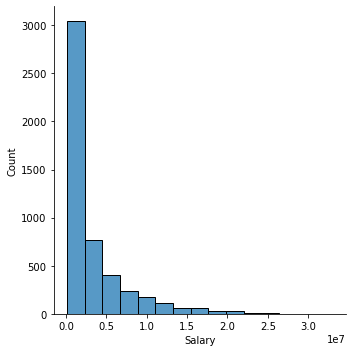

In [27]:
sns.displot(df['Salary'], bins=15, kde=False)
plt.show()

In [24]:
# look at distribution of salaries (suppressing scientific notation)
df['Salary'].describe().apply(lambda x: format(x, '.0f'))

count        4937
mean      3011304
std       4265619
min        100000
25%        327000
50%        980000
75%       4000000
max      33000000
Name: Salary, dtype: object

In [28]:
df['Salary'].quantile(0.25)

327000.0

In [29]:
df['Salary'].quantile(0.75)

4000000.0

In [30]:
Q1=df['Salary'].quantile(0.25)
Q3=df['Salary'].quantile(0.75)
IQR=Q3-Q1
IQR

3673000.0

In [31]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [32]:
lower_bound

-5182500.0

In [33]:
upper_bound

9509500.0

In [38]:
# filter salaries to remove outliers
df2 = df[(df.Salary<upper_bound)]
df2

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2016,WoodAlex,25,530000,3.73,56,25,66,5,1,4,181,255,0,215,76,NL,LAN,10
4932,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4
4933,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12
4934,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24


In [40]:
# export csv
df2.to_csv('outliers_removed.csv', index=False)

In [48]:
null_ERA = df['ERA'] <=0.01
null_ERA.value_counts()

False    4937
Name: ERA, dtype: int64

In [49]:
nonNull_ERA = df['ERA'] >=0.01
nonNull_ERA.value_counts()

True    4937
Name: ERA, dtype: int64

### Look at BFP stats

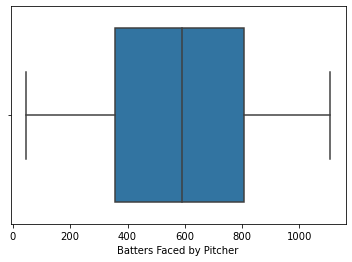

In [60]:
sns.boxplot(x=df2['Batters Faced by Pitcher'])
plt.show()

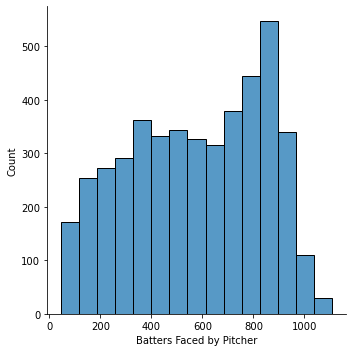

In [61]:
sns.displot(df2['Batters Faced by Pitcher'], bins=15, kde=False)
plt.show()

In [62]:
# look at distribution of salaries (suppressing scientific notation)
df2['Batters Faced by Pitcher'].describe().apply(lambda x: format(x, '.0f'))

count    4520
mean      573
std       263
min        45
25%       356
50%       591
75%       808
max      1108
Name: Batters Faced by Pitcher, dtype: object

In [63]:
Q1_bfp=df2['Batters Faced by Pitcher'].quantile(0.25)
Q3_bfp=df2['Batters Faced by Pitcher'].quantile(0.75)
IQR_bfp=Q3_bfp-Q1_bfp
IQR_bfp

452.0

In [64]:
lower_bound_bfp=Q1_bfp-1.5*IQR_bfp
upper_bound_bfp=Q3_bfp+1.5*IQR_bfp

In [65]:
lower_bound_bfp

-322.0

In [66]:
upper_bound_bfp

1486.0

lower and upper bounds are outside range of actual datapoints, no true outliers to be removed for BFP

### Outs pitched
---

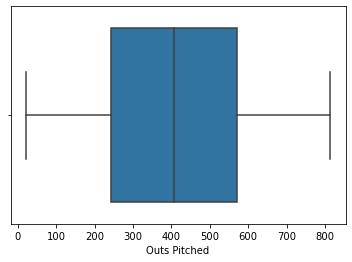

In [68]:
sns.boxplot(x=df2['Outs Pitched'])
plt.show()

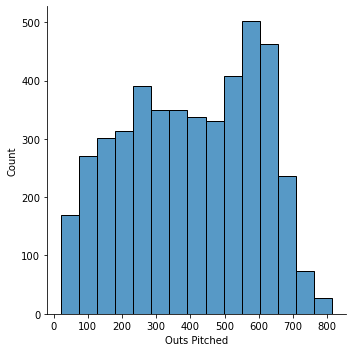

In [69]:
sns.displot(df2['Outs Pitched'], bins=15, kde=False)
plt.show()

In [70]:
# look at distribution of outs pitched (suppressing scientific notation)
df2['Outs Pitched'].describe().apply(lambda x: format(x, '.0f'))

count    4520
mean      400
std       191
min        21
25%       242
50%       407
75%       570
max       814
Name: Outs Pitched, dtype: object

In [71]:
Q1_op=df2['Outs Pitched'].quantile(0.25)
Q3_op=df2['Outs Pitched'].quantile(0.75)
IQR_op=Q3_op-Q1_op
IQR_op

328.0

In [72]:
lower_bound_op=Q1_op-1.5*IQR_op
upper_bound_op=Q3_op+1.5*IQR_op

In [73]:
lower_bound_op

-250.0

In [74]:
upper_bound_op

1062.0

#### no true outliers to remove for Outs Pitched

### ERA
---

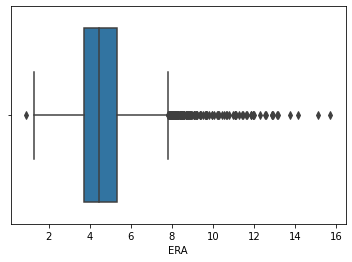

In [75]:
sns.boxplot(x=df2['ERA'])
plt.show()

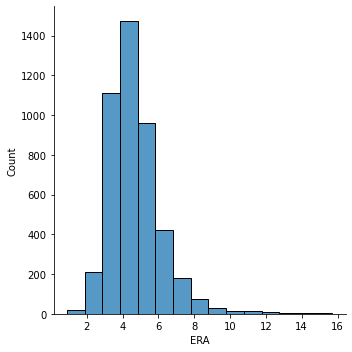

In [76]:
sns.displot(df2['ERA'], bins=15, kde=False)
plt.show()

In [77]:
# look at distribution of outs pitched (suppressing scientific notation)
df2['ERA'].describe().apply(lambda x: format(x, '.0f'))

count    4520
mean        5
std         1
min         1
25%         4
50%         4
75%         5
max        16
Name: ERA, dtype: object

In [79]:
Q1_ERA=df2['ERA'].quantile(0.25)
Q3_ERA=df2['ERA'].quantile(0.75)
IQR_ERA=Q3_ERA-Q1_ERA
IQR_ERA

1.6425

In [80]:
lower_bound_ERA=Q1_ERA-1.5*IQR_ERA
upper_bound_ERA=Q3_ERA+1.5*IQR_ERA

In [81]:
lower_bound_ERA

1.2462499999999999

In [82]:
upper_bound_ERA

7.81625

In [83]:
# filter salaries to remove outliers
df3 = df2[(df2.ERA<upper_bound_ERA)]
df3

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2016,WoodAlex,25,530000,3.73,56,25,66,5,1,4,181,255,0,215,76,NL,LAN,10
4932,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4
4933,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12
4934,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24


In [85]:
df3.to_csv('outliers_removed_sal-ERA.csv', index=False)

### Strike Outs
---

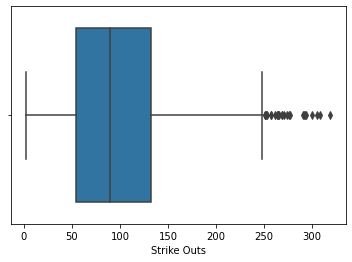

In [86]:
sns.boxplot(x=df3['Strike Outs'])
plt.show()

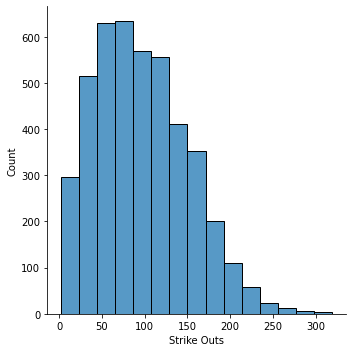

In [87]:
sns.displot(df3['Strike Outs'], bins=15, kde=False)
plt.show()

In [89]:
# look at distribution of outs pitched (suppressing scientific notation)
df3['Strike Outs'].describe().apply(lambda x: format(x, '.0f'))

count    4374
mean       96
std        54
min         2
25%        54
50%        90
75%       132
max       319
Name: Strike Outs, dtype: object

In [90]:
Q1_SO=df3['Strike Outs'].quantile(0.25)
Q3_SO=df3['Strike Outs'].quantile(0.75)
IQR_SO=Q3_SO-Q1_SO
IQR_SO

78.0

In [91]:
lower_bound_SO=Q1_SO-1.5*IQR_SO
upper_bound_SO=Q3_SO+1.5*IQR_SO

In [92]:
lower_bound_SO

-63.0

In [93]:
upper_bound_SO

249.0

In [98]:
# filter strike outs to remove outliers
SO = df3['Strike Outs']
df4 = df3[(SO<=upper_bound_SO)]
df4

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2016,WoodAlex,25,530000,3.73,56,25,66,5,1,4,181,255,0,215,76,NL,LAN,10
4932,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4
4933,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12
4934,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24


In [99]:
# look at distribution of outs pitched (suppressing scientific notation)
df4['Strike Outs'].describe().apply(lambda x: format(x, '.0f'))

count    4349
mean       95
std        52
min         2
25%        54
50%        90
75%       131
max       248
Name: Strike Outs, dtype: object

In [100]:
df4.to_csv('outliers_removed_sal-era-so.csv', index=False)

### Home Runs
---

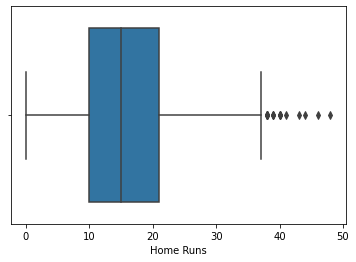

In [101]:
sns.boxplot(x=df4['Home Runs'])
plt.show()

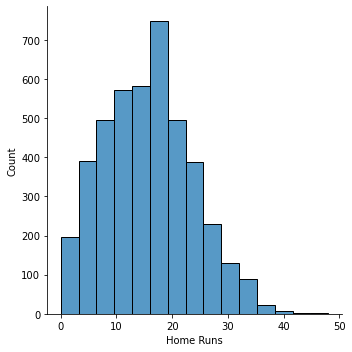

In [102]:
sns.displot(df4['Home Runs'], bins=15, kde=False)
plt.show()

In [104]:
# look at distribution of outs pitched (suppressing scientific notation)
df4['Home Runs'].describe().apply(lambda x: format(x, '.0f'))

count    4349
mean       16
std         8
min         0
25%        10
50%        15
75%        21
max        48
Name: Home Runs, dtype: object

In [105]:
Q1_HR=df4['Home Runs'].quantile(0.25)
Q3_HR=df4['Home Runs'].quantile(0.75)
IQR_HR=Q3_HR-Q1_HR
IQR_HR

11.0

In [106]:
lower_bound_HR=Q1_HR-1.5*IQR_HR
upper_bound_HR=Q3_HR+1.5*IQR_HR

In [108]:
lower_bound_HR

-6.5

In [109]:
upper_bound_HR

37.5

#### no true outliers to remove from Home Runs col

### Games Started
---

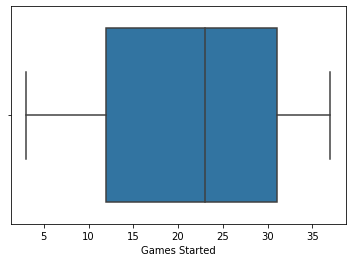

In [111]:
sns.boxplot(x=df4['Games Started'])
plt.show()

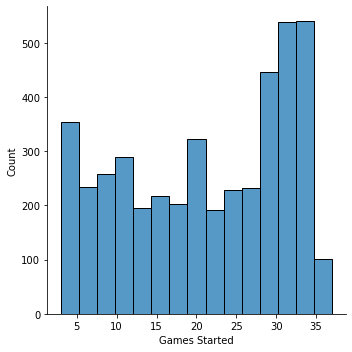

In [112]:
sns.displot(df4['Games Started'], bins=15, kde=False)
plt.show()

In [113]:
# look at distribution of outs pitched (suppressing scientific notation)
df4['Games Started'].describe().apply(lambda x: format(x, '.0f'))

count    4349
mean       21
std        10
min         3
25%        12
50%        23
75%        31
max        37
Name: Games Started, dtype: object

In [114]:
Q1_GS=df4['Games Started'].quantile(0.25)
Q3_GS=df4['Games Started'].quantile(0.75)
IQR_GS=Q3_GS-Q1_GS
IQR_GS

19.0

In [115]:
lower_bound_GS=Q1_GS-1.5*IQR_GS
upper_bound_GS=Q3_GS+1.5*IQR_GS

In [116]:
lower_bound_GS

-16.5

In [117]:
upper_bound_GS

59.5

#### no true outliers to remove for Games Started

### Look at relationship between each feature + salary
---

In [118]:
df4

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2016,WoodAlex,25,530000,3.73,56,25,66,5,1,4,181,255,0,215,76,NL,LAN,10
4932,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4
4933,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12
4934,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24


In [119]:
# focus on select features
df5= df.filter(['Batters Faced by Pitcher', 'Outs Pitched','ERA','Strike Outs','Salary','Home Runs','Games Started'])
df5

,Batters Faced by Pitcher,Outs Pitched,ERA,Strike Outs,Salary,Home Runs,Games Started
0,925,635,4.51,105,185000,16,33
1,162,104,5.97,25,100000,0,7
2,63,43,3.77,7,100000,0,3
3,797,566,4.53,82,300000,20,31
4,784,557,2.76,127,100000,13,24
...,...,...,...,...,...,...,...
4932,365,260,3.53,56,2600000,11,4
4933,328,224,5.79,50,510500,12,12
4934,656,470,3.33,127,514500,12,24
4935,406,266,6.19,94,4250000,28,13


In [121]:
# create sal-log col
df5['sal-log']=np.log10(df5['Salary'])
df5

,Batters Faced by Pitcher,Outs Pitched,ERA,Strike Outs,Salary,Home Runs,Games Started,sal-log
0,925,635,4.51,105,185000,16,33,5.267172
1,162,104,5.97,25,100000,0,7,5.000000
2,63,43,3.77,7,100000,0,3,5.000000
3,797,566,4.53,82,300000,20,31,5.477121
4,784,557,2.76,127,100000,13,24,5.000000
...,...,...,...,...,...,...,...,...
4932,365,260,3.53,56,2600000,11,4,6.414973
4933,328,224,5.79,50,510500,12,12,5.707996
4934,656,470,3.33,127,514500,12,24,5.711385
4935,406,266,6.19,94,4250000,28,13,6.628389


In [151]:
# create sal-log col
df5['era_logN']=np.log(df5['ERA'])
df5['sal_logN']=np.log(df5['Salary'])
df5

,Batters Faced by Pitcher,Outs Pitched,ERA,Strike Outs,Salary,Home Runs,Games Started,sal-log,sal-era,era_log10,era_logN,sal_logN
0,925,635,4.51,105,185000,16,33,5.267172,0.654177,0.654177,1.506297,12.128111
1,162,104,5.97,25,100000,0,7,5.000000,0.775974,0.775974,1.786747,11.512925
2,63,43,3.77,7,100000,0,3,5.000000,0.576341,0.576341,1.327075,11.512925
3,797,566,4.53,82,300000,20,31,5.477121,0.656098,0.656098,1.510722,12.611538
4,784,557,2.76,127,100000,13,24,5.000000,0.440909,0.440909,1.015231,11.512925
...,...,...,...,...,...,...,...,...,...,...,...,...
4932,365,260,3.53,56,2600000,11,4,6.414973,0.547775,0.547775,1.261298,14.771022
4933,328,224,5.79,50,510500,12,12,5.707996,0.762679,0.762679,1.756132,13.143146
4934,656,470,3.33,127,514500,12,24,5.711385,0.522444,0.522444,1.202972,13.150951
4935,406,266,6.19,94,4250000,28,13,6.628389,0.791691,0.791691,1.822935,15.262430


In [149]:
# define variables
BFP = df5['Batters Faced by Pitcher'].values
OP = df5['Outs Pitched']
ERA = df5['ERA']
SO = df5['Strike Outs']
Sal= df5['Salary'].values
HR = df5['Home Runs']
GS = df5['Games Started']
sal_log = df5['sal-log']
era_log10=df5['era_log10']

### Stats vs Raw Salary
---

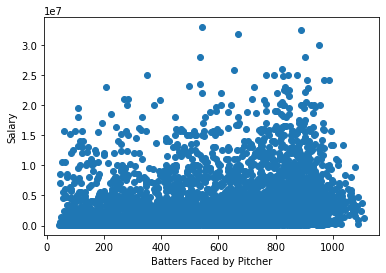

In [137]:
plt.scatter(BFP,Sal)
plt.xlabel('Batters Faced by Pitcher')
plt.ylabel('Salary')
plt.show()

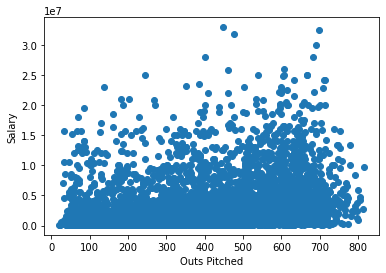

In [138]:
plt.scatter(OP,Sal)
plt.xlabel('Outs Pitched')
plt.ylabel('Salary')
plt.show()

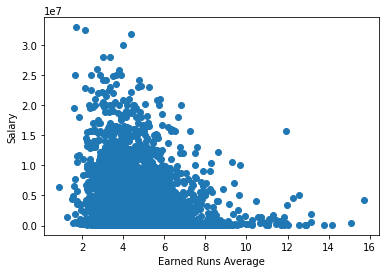

In [139]:
plt.scatter(ERA,Sal)
plt.xlabel('Earned Runs Average')
plt.ylabel('Salary')
plt.show()

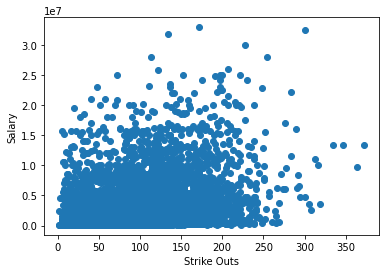

In [140]:
plt.scatter(SO,Sal)
plt.xlabel('Strike Outs')
plt.ylabel('Salary')
plt.show()

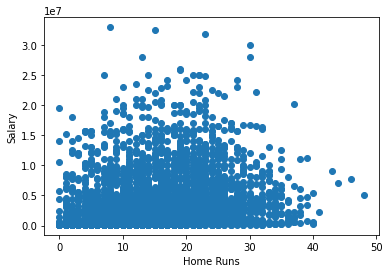

In [141]:
plt.scatter(HR,Sal)
plt.xlabel('Home Runs')
plt.ylabel('Salary')
plt.show()

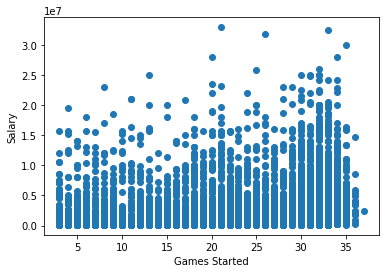

In [142]:
plt.scatter(GS,Sal)
plt.xlabel('Games Started')
plt.ylabel('Salary')
plt.show()

### Stats vs Log-Transformed Salary
---

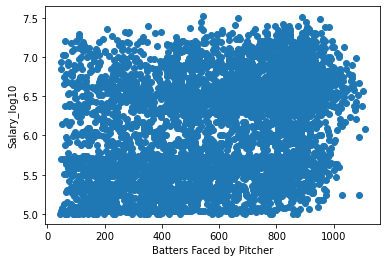

In [143]:
plt.scatter(BFP,sal_log)
plt.xlabel('Batters Faced by Pitcher')
plt.ylabel('Salary_log10')
plt.show()

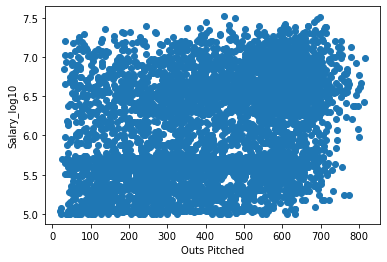

In [144]:
plt.scatter(OP,sal_log)
plt.xlabel('Outs Pitched')
plt.ylabel('Salary_log10')
plt.show()

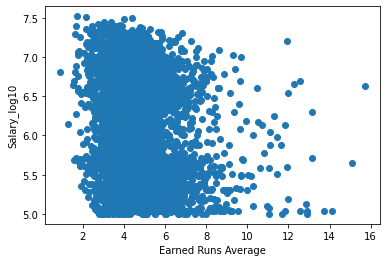

In [146]:
plt.scatter(ERA,sal_log)
plt.xlabel('Earned Runs Average')
plt.ylabel('Salary_log10')
plt.show()

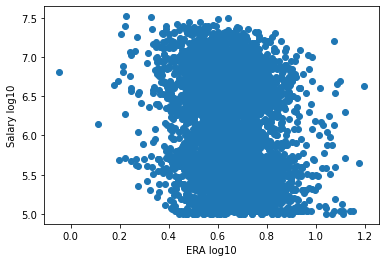

In [150]:
plt.scatter(era_log10,sal_log)
plt.xlabel('ERA log10')
plt.ylabel('Salary log10')
plt.show()

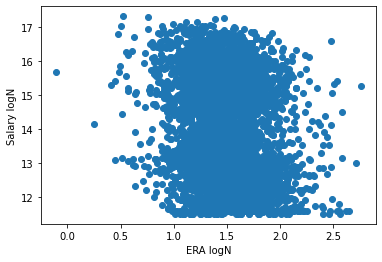

In [152]:
era_logN = df5['era_logN']
sal_logN = df5['sal_logN']

plt.scatter(era_logN,sal_logN)
plt.xlabel('ERA logN')
plt.ylabel('Salary logN')
plt.show()